In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Data loading

In [2]:
train = pd.read_pickle("./data/new_rfe_datasets/train_rfe.pkl")
test = pd.read_pickle("./data/new_rfe_datasets/test_rfe.pkl")

train_DL = pd.read_pickle("./data/new_rfe_datasets/train_DL_rfe.pkl")
test_DL = pd.read_pickle("./data/new_rfe_datasets/test_DL_rfe.pkl")
val_DL = pd.read_pickle("./data/new_rfe_datasets/validate_DL_rfe.pkl")

In [3]:
def load_data(train, test):
    train_X = np.array(train.loc[:,~train.columns.isin(['ChEMBL_ID', 'smiles','pIC50'])])
    train_Y = np.array(train.pIC50)
    test_X = np.array(test.loc[:,~test.columns.isin(['ChEMBL_ID', 'smiles','pIC50'])])
    test_Y = np.array(test.pIC50)

    return train_X, train_Y, test_X, test_Y

def load_data_DL(train_DL, test_DL, val_DL):
    train_X = np.array(train_DL.loc[:,~train_DL.columns.isin(['ChEMBL_ID', 'smiles','pIC50'])])
    train_Y = np.array(train_DL.pIC50)
    test_X = np.array(test_DL.loc[:,~test_DL.columns.isin(['ChEMBL_ID', 'smiles','pIC50'])])
    test_Y = np.array(test_DL.pIC50)
    val_X = np.array(val_DL.loc[:,~val_DL.columns.isin(['ChEMBL_ID', 'smiles','pIC50'])])
    val_Y = np.array(val_DL.pIC50)

    return train_X, train_Y, test_X, test_Y, val_X, val_Y

In [4]:
def root_mean_squared_error(test_y, pred_y):
    return np.sqrt(mean_squared_error(test_y, pred_y))

In [5]:
def evaluate(train_Y, pred_Y_train, test_Y, pred_Y_test):
    print("Train Root Mean Squared Error:", root_mean_squared_error(train_Y, pred_Y_train))
    print("Train Mean Absolute Error:", mean_absolute_error(train_Y, pred_Y_train))
    print("Train R2:", r2_score(train_Y, pred_Y_train))
    print('\n')
    print("Test Root Mean Squared Error:", mean_squared_error(test_Y, pred_Y_test))
    print("Test Mean Absolute Error:", mean_absolute_error(test_Y, pred_Y_test))
    print("Test R2:", r2_score(test_Y, pred_Y_test))
    print('\n')

In [6]:
def visualizeTrainTest(train_Y, pred_Y_train, test_Y, pred_Y_test):
    fig, axs = plt.subplots(1,2)
    fig.set_figheight(5)
    fig.set_figwidth(10)

    pred_pairs_train = {key: value for key, value in zip(train_Y, pred_Y_train)}
    # pred_pairs_train = dict(sorted(pred_pairs_train.items()))
    pred_pairs_test = {key: value for key, value in zip(test_Y, pred_Y_test)}
    # pred_pairs_test = dict(sorted(pred_pairs_test.items()))


    axs[0].set_title("Train predictions")
    axs[0].plot(pred_pairs_train.values(), color="darkblue", label='predictions')
    axs[0].plot(pred_pairs_train.keys(), '.', color="red", label='true data', markersize=5)
    axs[0].set_xlabel("Molecules")
    axs[0].set_ylabel("pIC50")
    axs[0].legend()
    axs[0].grid()

    axs[1].set_title("Test predictions")
    axs[1].plot(pred_pairs_test.values(), color="darkblue", label='predictions')
    axs[1].plot(pred_pairs_test.keys(), '.', color="red", label='true data', markersize=5)
    axs[1].set_xlabel("Molecules")
    axs[1].set_ylabel("pIC50")
    axs[1].legend()
    axs[1].grid()

    fig.tight_layout()
    plt.show()

### Feature importance

In [7]:
train_RFE = pd.read_pickle("./data/train_RFE.pkl")
cols_RFE = train_RFE.loc[:,~train_RFE.columns.isin(['ChEMBL_ID', 'smiles','pIC50'])].columns
cols = train.loc[:,~train.columns.isin(['ChEMBL_ID', 'smiles','pIC50'])].columns

feature_importance = {key: value for key, value in zip(cols, np.array([int(c_i in cols_RFE) for c_i in cols]))}

### Random Forest

Train Root Mean Squared Error: 0.2798498255044088
Train Mean Absolute Error: 0.21115725626742077
Train R2: 0.9289346504404187


Test Root Mean Squared Error: 0.7379688490906582
Test Mean Absolute Error: 0.6883976249999848
Test R2: 0.40757925156560637




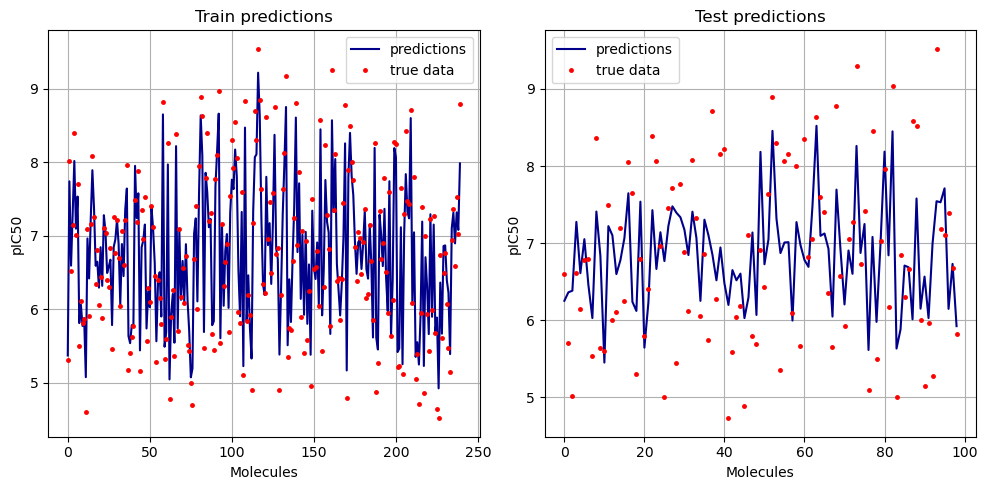

In [12]:
from sklearn.ensemble import RandomForestRegressor

## Fitting

train_X, train_Y, test_X, test_Y,= load_data(train, test)
forest = RandomForestRegressor(random_state=0)
forest.fit(train_X, train_Y)

## Predictions

pred_Y_train_forest = forest.predict(train_X)
pred_Y_test_forest = forest.predict(test_X)
evaluate(train_Y, pred_Y_train_forest, test_Y, pred_Y_test_forest)

## Visualization

visualizeTrainTest(train_Y, pred_Y_train_forest, test_Y, pred_Y_test_forest)


VSA_EState4 0.05923639161138488
SlogP_VSA3 0.06695655858462779
PNSA1 0.06316524371614794
n5AHRing 0.03232986265143749
PEOE_VSA13 0.028028781281215286
VSA_EState8 0.09954102757022934
piPC10 0.0773775416244435
GGI5 0.0424530469353722
PNSA2 0.05086567485657663
SaaCH 0.030344870752797317
BalabanJ 0.02356663889730307
SlogP_VSA10 0.01587653385164192
FilterItLogS 0.05762287725025616
n6AHRing 0.008346420377785067
PEOE_VSA9 0.028545212664984318
RNCS 0.038070062272004476
SsssN 0.03426982358634875
ZMIC2 0.04927564364930972
Xpc-5dv 0.04034111083665858
PEOE_VSA2 0.011592885432912037
MDEC-33 0.04331635726171185
VSA_EState7 0.030461676129088375
PEOE_VSA7 0.020861749857898255
SRW09 0.017005366667135664
SsCH3 0.03054864168072943


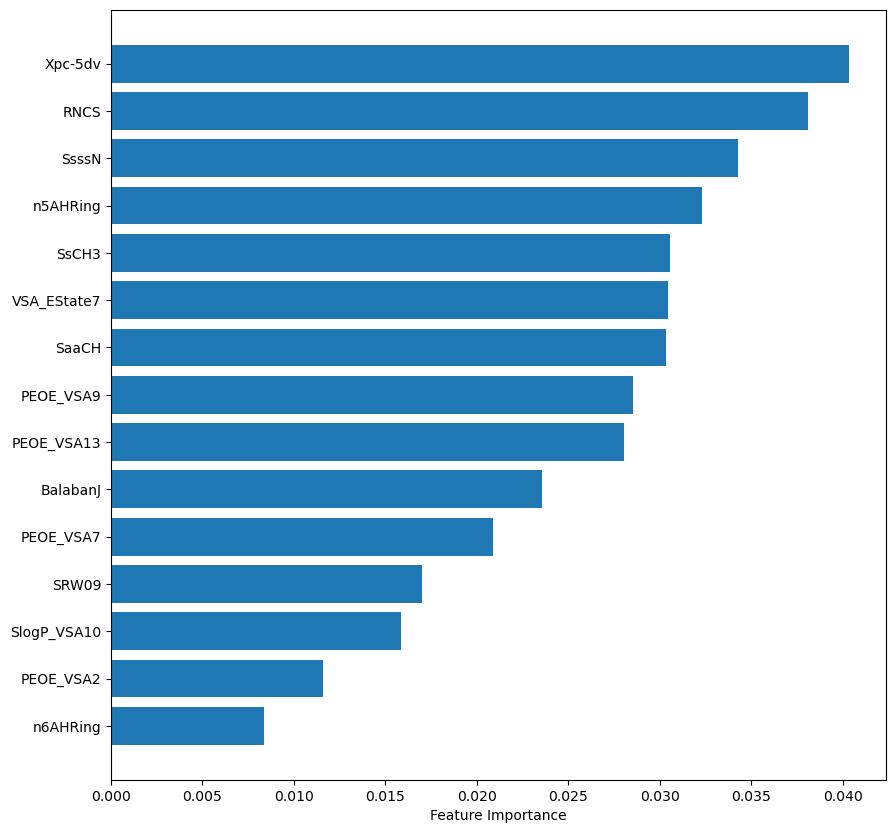

In [13]:
for feature, importance in zip(np.array(train_DL.loc[:,~train.columns.isin(['ChEMBL_ID', 'smiles','pIC50'])].columns), forest.feature_importances_):    
    print(feature, importance)
    feature_importance[feature] += importance

forest_sort = forest.feature_importances_.argsort()

plt.figure(figsize=(10,10))
plt.barh(np.array(train_DL.loc[:,~train.columns.isin(['ChEMBL_ID', 'smiles','pIC50'])].columns)[forest_sort][:15], 
         forest.feature_importances_[forest_sort][:15])
plt.xlabel("Feature Importance")
plt.show()

In [14]:
max(forest.feature_importances_)

0.09954102757022934

### SVM

Train Root Mean Squared Error: 0.948172901869017
Train Mean Absolute Error: 0.7328528657275627
Train R2: 0.18420151519826156


Test Root Mean Squared Error: 1.2431638486274295
Test Mean Absolute Error: 0.9075394332733384
Test R2: 0.0020228380399182067




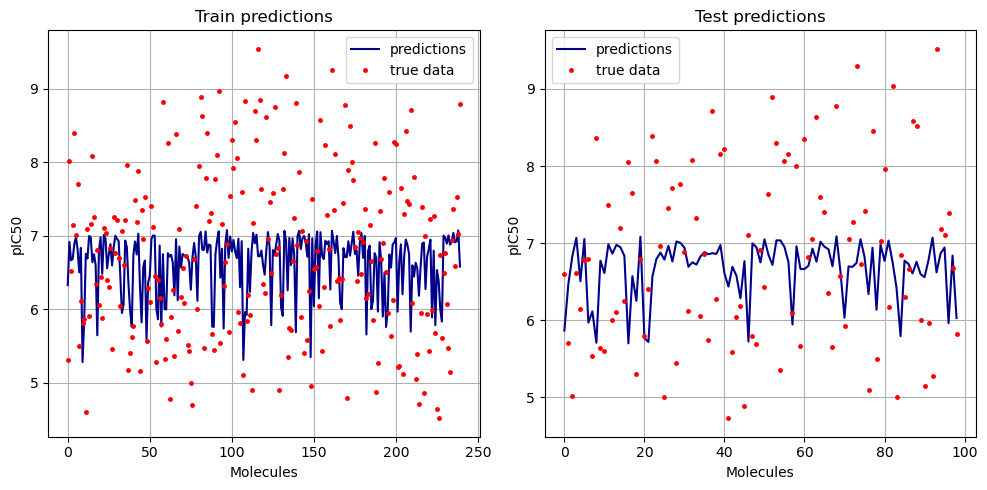

In [15]:
from sklearn.svm import SVR

rain_X, train_Y, test_X, test_Y = load_data(train, test)

## Fitting

svm = SVR()
svm.fit(train_X, train_Y)

## Predictions

pred_Y_train_svm = svm.predict(train_X)
pred_Y_test_svm = svm.predict(test_X)
evaluate(train_Y, pred_Y_train_svm, test_Y, pred_Y_test_svm)

## Visualization

visualizeTrainTest(train_Y, pred_Y_train_svm, test_Y, pred_Y_test_svm)

### DNN

In [39]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

train_X, train_Y, test_X, test_Y = load_data(train, test)

learn_rate = 0.01
optimizer = Adam(learning_rate=learn_rate)

## Building the model

DNN = Sequential()
DNN.add(Dense(64, kernel_initializer='normal', input_dim = train_X.shape[1], activation='relu'))
DNN.add(Dense(64, kernel_initializer='normal',activation='relu'))
DNN.add(Dense(128, kernel_initializer='normal',activation='relu'))
DNN.add(Dense(1, kernel_initializer='normal',activation='linear'))

## Compiling

DNN.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
DNN.summary()

/home/teeder/miniconda3/envs/PROJEKT_dipl/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 64)             │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,273 (55.75 KB)

 Trainable params: 14,273 (55.75 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
from sklearn.model_selection import  KFold
avg_train_loss = []
avg_val_loss = []


N_EPOCHS = 200

for n_epoch in range(N_EPOCHS):
    print('\nEPOCH ', n_epoch+1, '-----------------------------------------------------------------------')
    folds = list(KFold(n_splits=3, shuffle=True, random_state=0).split(train_X, train_Y))
    train_loss = []; train_acc = []
    val_loss = []; val_acc = []

    for j, (train_idx, val_idx) in enumerate(folds):
        print('\nEpoch ', n_epoch, 'Fold ',j)
        X_train_cv = train_X[train_idx]
        y_train_cv = train_Y[train_idx]
        X_valid_cv = train_X[val_idx]
        y_valid_cv = train_Y[val_idx]

        DNN.fit(X_train_cv, y_train_cv, batch_size=64, epochs=1, validation_data=(X_valid_cv, y_valid_cv))
        train_loss.append(DNN.history.history['loss'])
        val_loss.append(DNN.history.history['val_loss'])
    
    avg_train_loss.append(np.average(train_loss))
    avg_val_loss.append(np.average(val_loss))
    print(f'Epoch {n_epoch} - val_loss: {avg_val_loss[-1]}\n')


EPOCH  1 -----------------------------------------------------------------------

Epoch  0 Fold  0
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 385ms/step - loss: 175.2101 - mse: 175.2101 - val_loss: 60.4874 - val_mse: 60.4874

Epoch  0 Fold  1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 47.3299 - mse: 47.3299 - val_loss: 13.1919 - val_mse: 13.1919

Epoch  0 Fold  2
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 294ms/step - loss: 15.6367 - mse: 15.6367 - val_loss: 9.3172 - val_mse: 9.3172
Epoch 0 - val_loss: 27.66550636291504


EPOCH  2 -----------------------------------------------------------------------

Epoch  1 Fold  0
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.9273 - mse: 9.9273 - val_loss: 6.2111 - val_mse: 6.2111

Epoch  1 Fold  1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.0640 - mse: 5.0640 - val_loss: 5.6761 - val_mse: 5.6761

Epoch  1 Fold  2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.4849 - mse: 4.4849 - val_loss: 5.8614 - val_mse: 5.8614
Epoch 1 - val_loss: 5.916205088297526


EPOCH  3 --

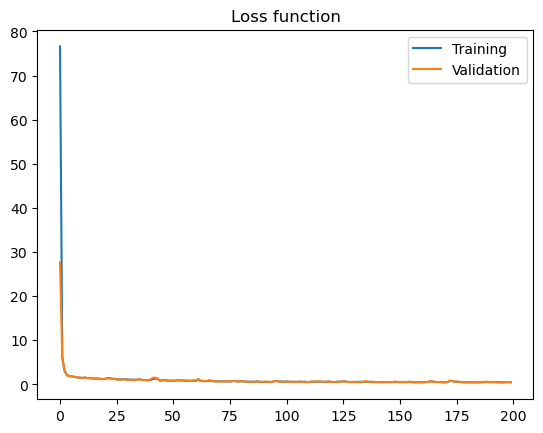

In [41]:
plt.plot(avg_train_loss, label='Training')
plt.plot(avg_val_loss, label='Validation')
plt.title('Loss function')
plt.legend()
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Train Root Mean Squared Error: 0.6557004650541686
Train Mean Absolute Error: 0.5123909812261542
Train R2: 0.6098615096791133


Test Root Mean Squared Error: 0.9351373637221934
Test Mean Absolute Error: 0.7585789567629497
Test R2: 0.24929788352460625




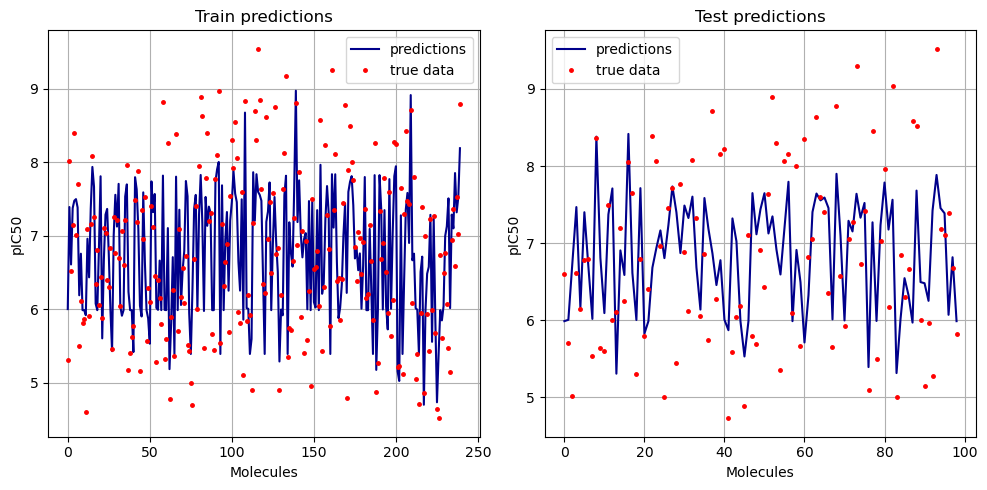

In [42]:
pred_Y_train_dnn = DNN.predict(train_X)
pred_Y_test_dnn = DNN.predict(test_X)
evaluate(train_Y, pred_Y_train_dnn, test_Y, pred_Y_test_dnn)
visualizeTrainTest(train_Y, pred_Y_train_dnn, test_Y, pred_Y_test_dnn)

### ARD

Train Root Mean Squared Error: 0.823743823357112
Train Mean Absolute Error: 0.645144991850125
Train R2: 0.3842673856923202


Test Root Mean Squared Error: 0.9698064426923335
Test Mean Absolute Error: 0.7923918628219354
Test R2: 0.2214665167449248




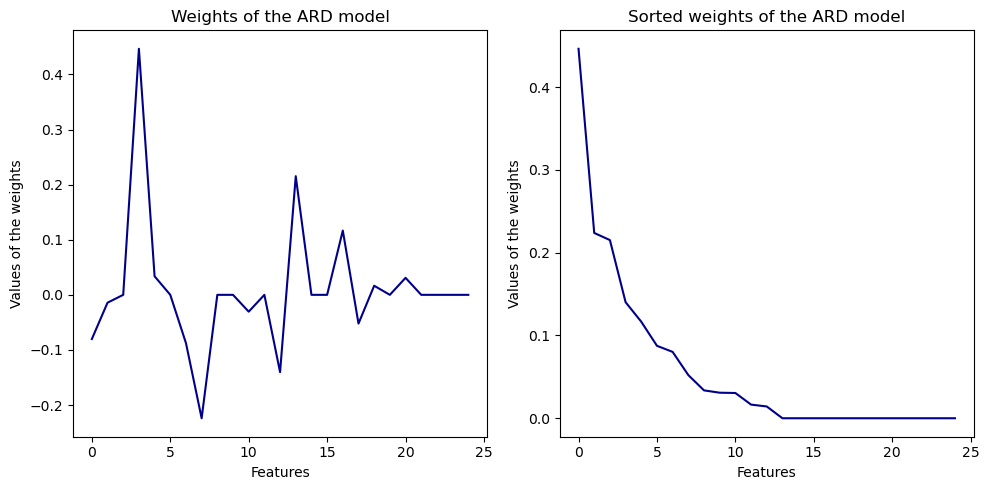

In [46]:
from sklearn import linear_model

train_X, train_Y, test_X, test_Y = load_data(train, test)

ard = linear_model.ARDRegression()
ard.fit(train_X, train_Y)

pred_Y_train_ard = ard.predict(train_X)
pred_Y_test_ard = ard.predict(test_X)
evaluate(train_Y, pred_Y_train_ard, test_Y, pred_Y_test_ard)

fig, axs = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(10)

axs[0].set_title("Weights of the ARD model")
axs[0].plot(ard.coef_, color="darkblue")
axs[0].set_xlabel("Features")
axs[0].set_ylabel("Values of the weights")

axs[1].set_title("Sorted weights of the ARD model")
axs[1].plot(sorted(np.abs(ard.coef_),reverse=True), color="darkblue")
axs[1].set_xlabel("Features")
axs[1].set_ylabel("Values of the weights")

fig.tight_layout()
plt.show()

Knee at: None	 Treshold:  None


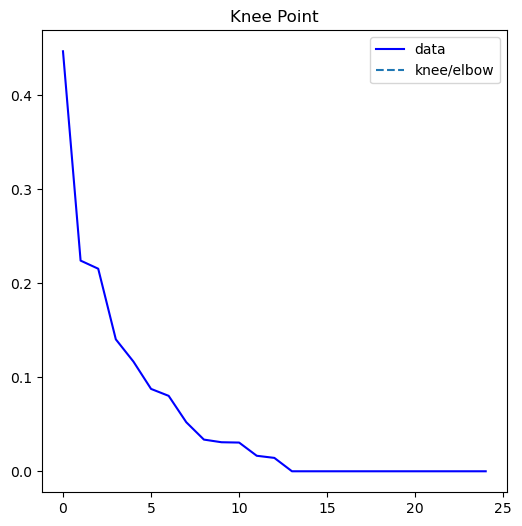

In [47]:
#Simple module to find the knee in a series
from kneed import KneeLocator

kneedle = KneeLocator(list(range(len(ard.coef_))), sorted(np.abs(ard.coef_), reverse=True), S=50, curve='convex', direction='decreasing')
print(f'Knee at: {kneedle.knee}\t Treshold: ',kneedle.knee_y)
kneedle.plot_knee()

In [49]:
mask = abs(ard.coef_) > 0.04

cols = np.array(train_DL.loc[:,~train.columns.isin(['ChEMBL_ID', 'smiles','pIC50'])].columns)[mask]
vals = ard.coef_[mask]
feature_weights = {key: value for key, value in zip(cols, vals)}
sorted_feature_weights = sorted(feature_weights.items(), key=lambda x:abs(x[1]), reverse=True)

print(len(feature_weights))
sorted_feature_weights


8


[('n5AHRing', 0.4464398197418472),
 ('GGI5', -0.2239336931552649),
 ('n6AHRing', 0.21530697532512852),
 ('FilterItLogS', -0.14024500721490776),
 ('SsssN', 0.116600570795585),
 ('piPC10', -0.0875519347086542),
 ('VSA_EState4', -0.08016998440204982),
 ('ZMIC2', -0.05214286182384425)]

### ARD + DNN

In [51]:
train_X, train_Y, test_X, test_Y = load_data(train_DL, test_DL)

ard = linear_model.ARDRegression()
ard.fit(train_X, train_Y)

kneedle = KneeLocator(list(range(len(ard.coef_))), sorted(np.abs(ard.coef_), reverse=True), S=50, curve='convex', direction='decreasing')
mask = abs(ard.coef_) > 0.04
train_X = train_X[:,mask]
test_X = test_X[:,mask]

## Building the model

DNN_ARD = Sequential()
DNN_ARD.add(Dense(64, kernel_initializer='normal', input_dim = train_X.shape[1], activation='relu'))
DNN_ARD.add(Dense(128, kernel_initializer='normal',activation='relu'))
DNN_ARD.add(Dense(64, kernel_initializer='normal',activation='relu'))
DNN_ARD.add(Dense(1, kernel_initializer='normal',activation='linear'))

## Compiling

DNN_ARD.compile(loss='mse', optimizer='adam', metrics=['mse'])
DNN_ARD.summary()

/home/teeder/miniconda3/envs/PROJEKT_dipl/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,153 (67.00 KB)

 Trainable params: 17,153 (67.00 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
avg_train_loss = []
avg_val_loss = []


N_EPOCHS = 200

for n_epoch in range(N_EPOCHS):
    print('\nEPOCH ', n_epoch+1, '-----------------------------------------------------------------------')
    folds = list(KFold(n_splits=3, shuffle=True, random_state=0).split(train_X, train_Y))
    train_loss = []; train_acc = []
    val_loss = []; val_acc = []

    for j, (train_idx, val_idx) in enumerate(folds):
        print('\nEpoch ', n_epoch, 'Fold ',j)
        X_train_cv = train_X[train_idx]
        y_train_cv = train_Y[train_idx]
        X_valid_cv = train_X[val_idx]
        y_valid_cv = train_Y[val_idx]

        DNN_ARD.fit(X_train_cv, y_train_cv, batch_size=64, epochs=1, validation_data=(X_valid_cv, y_valid_cv))
        train_loss.append(DNN_ARD.history.history['loss'])
        val_loss.append(DNN_ARD.history.history['val_loss'])
    
    avg_train_loss.append(np.average(train_loss))
    avg_val_loss.append(np.average(val_loss))
    print(f'Epoch {n_epoch} - val_loss: {avg_val_loss[-1]}\n')


EPOCH  1 -----------------------------------------------------------------------

Epoch  0 Fold  0
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 454ms/step - loss: 45.4391 - mse: 45.4391 - val_loss: 41.5940 - val_mse: 41.5940

Epoch  0 Fold  1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 41.8543 - mse: 41.8543 - val_loss: 39.3487 - val_mse: 39.3487

Epoch  0 Fold  2
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 369ms/step - loss: 38.5387 - mse: 38.5387 - val_loss: 34.9468 - val_mse: 34.9468
Epoch 0 - val_loss: 38.62983830769857


EPOCH  2 -----------------------------------------------------------------------

Epoch  1 Fold  0
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 33.2981 - mse: 33.2981 - val_loss: 26.0902 - val_mse: 26.0902

Epoch  1 Fold  1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 25.0230 - mse: 25.0230 - val_loss: 18.2165 - val_mse: 18.2165

Epoch  1 Fold  2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 16.0838 - mse: 16.0838 - val_loss: 9.3432 - val_mse: 9.3432
Epoch 1 - val_loss: 17.88328742980957


E

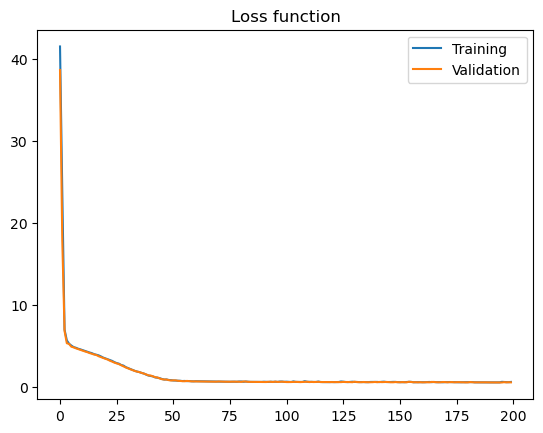

In [53]:
plt.plot(avg_train_loss, label='Training')
plt.plot(avg_val_loss, label='Validation')
plt.title('Loss function')
plt.legend()
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Train Root Mean Squared Error: 0.779437153564437
Train Mean Absolute Error: 0.6219659022393018
Train R2: 0.4578856509337358


Test Root Mean Squared Error: 0.8459064547712987
Test Mean Absolute Error: 0.7585497178855231
Test R2: 0.332947548522464




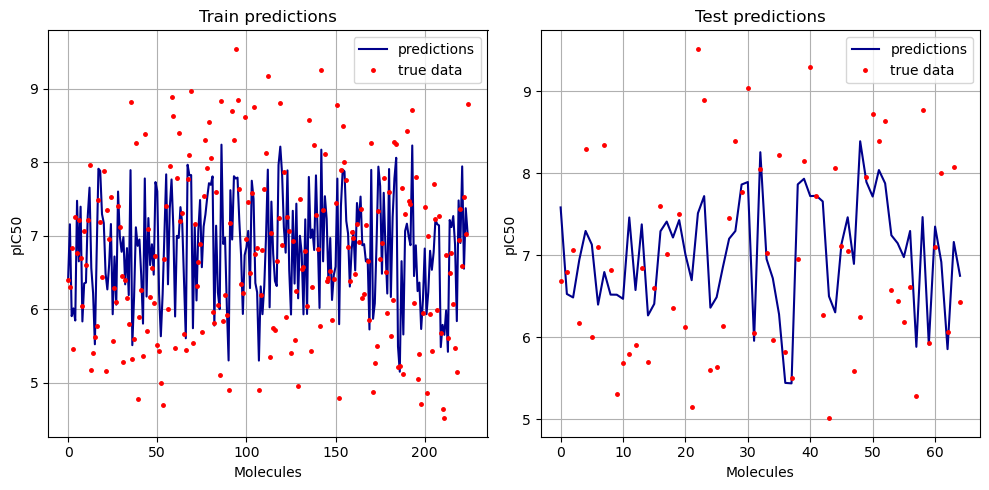

In [54]:
pred_Y_train_dnn_ard = DNN_ARD.predict(train_X)
pred_Y_test_dnn_ard = DNN_ARD.predict(test_X)
evaluate(train_Y, pred_Y_train_dnn_ard, test_Y, pred_Y_test_dnn_ard)
visualizeTrainTest(train_Y, pred_Y_train_dnn_ard, test_Y, pred_Y_test_dnn_ard)

### Linear regression

Train Root Mean Squared Error: 0.8041912384657065
Train Mean Absolute Error: 0.6279336121358526
Train R2: 0.41315083610735504


Test Root Mean Squared Error: 1.0305180589604086
Test Mean Absolute Error: 0.8072517964955117
Test R2: 0.17272892952493046




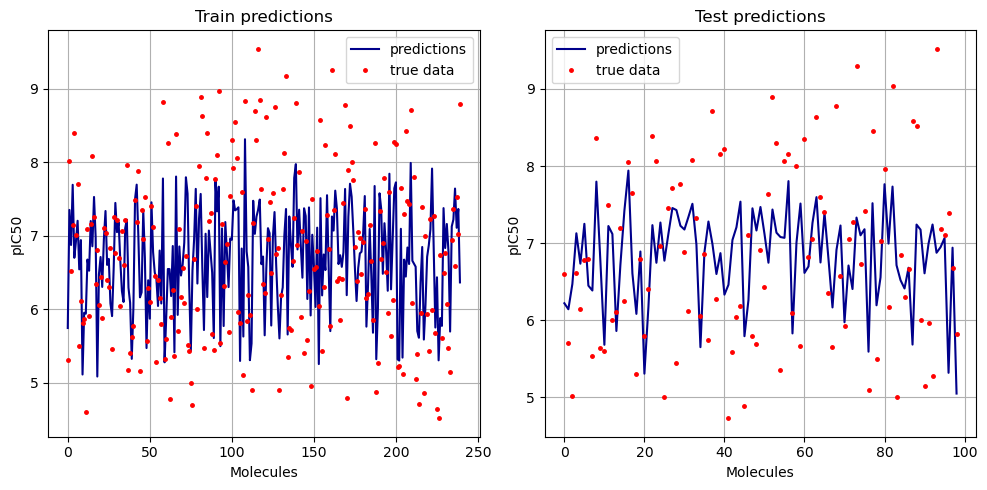

In [60]:
from sklearn.linear_model import LinearRegression

train_X, train_Y, test_X, test_Y = load_data(train, test)

lr = LinearRegression()
lr.fit(train_X, train_Y)

pred_Y_train_lr = lr.predict(train_X)
pred_Y_test_lr = lr.predict(test_X)

evaluate(train_Y, pred_Y_train_lr, test_Y, pred_Y_test_lr)
visualizeTrainTest(train_Y, pred_Y_train_lr, test_Y, pred_Y_test_lr)


### Ridge regression

In [61]:
from sklearn.linear_model import Ridge

train_X, train_Y, test_X, test_Y = load_data(train_DL, test_DL)

for alpha in [0.1, 0.5, 1, 2, 4, 6]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_X, train_Y)

    pred_Y_train_ridge = ridge.predict(train_X)
    pred_Y_test_ridge = ridge.predict(test_X)

    print('=================================================================')
    print(f'Alpha: {alpha}')
    evaluate(train_Y, pred_Y_train_ridge, test_Y, pred_Y_test_ridge)



Alpha: 0.1
Train Root Mean Squared Error: 0.8087239652623357
Train Mean Absolute Error: 0.6277858275997731
Train R2: 0.4163811352999093


Test Root Mean Squared Error: 1.0597155564914733
Test Mean Absolute Error: 0.8409248747082013
Test R2: 0.16434511660318996


Alpha: 0.5
Train Root Mean Squared Error: 0.8087395707434432
Train Mean Absolute Error: 0.6278089120259754
Train R2: 0.41635861156763276


Test Root Mean Squared Error: 1.0585418694980158
Test Mean Absolute Error: 0.840608105001172
Test R2: 0.16527064540349312


Alpha: 1
Train Root Mean Squared Error: 0.8087841810511479
Train Mean Absolute Error: 0.6278841031183282
Train R2: 0.41629422213756806


Test Root Mean Squared Error: 1.0572248569576415
Test Mean Absolute Error: 0.8402297368487173
Test R2: 0.16630919575232672


Alpha: 2
Train Root Mean Squared Error: 0.8089378377637306
Train Mean Absolute Error: 0.6283439332253741
Train R2: 0.41607241060133393


Test Root Mean Squared Error: 1.0550068732764382
Test Mean Absolute Error: 

Train Root Mean Squared Error: 0.8087239652623357
Train Mean Absolute Error: 0.6277858275997731
Train R2: 0.4163811352999093


Test Root Mean Squared Error: 1.0597155564914733
Test Mean Absolute Error: 0.8409248747082013
Test R2: 0.16434511660318996




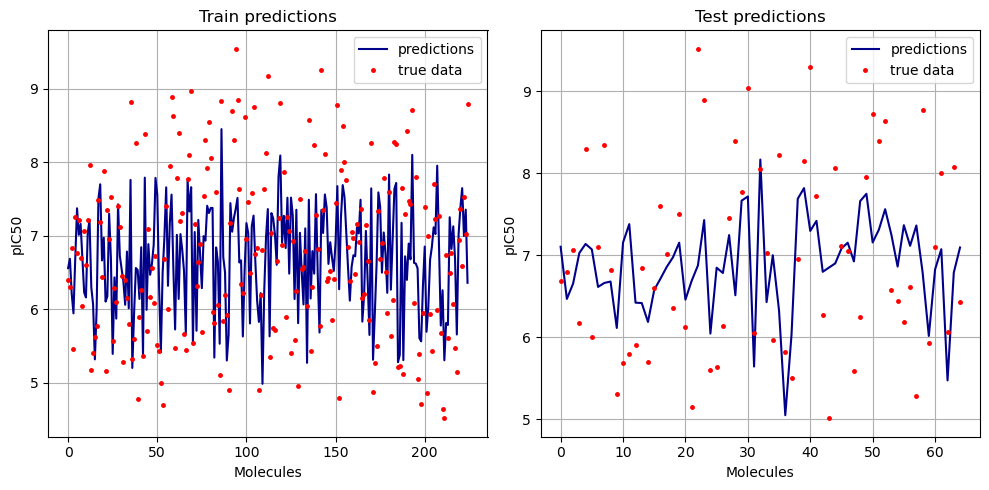

In [62]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_X, train_Y)

pred_Y_train_ridge = ridge.predict(train_X)
pred_Y_test_ridge = ridge.predict(test_X)

evaluate(train_Y, pred_Y_train_ridge, test_Y, pred_Y_test_ridge)
visualizeTrainTest(train_Y, pred_Y_train_ridge, test_Y, pred_Y_test_ridge)

### XGBoost

Best Hyperparameters: {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'reg_lambda': 5, 'subsample': 0.8}
Train Root Mean Squared Error: 0.02018879009191584
Train Mean Absolute Error: 0.01200217908793823
Train R2: 0.9996362949922766


Test Root Mean Squared Error: 0.7315611099346263
Test Mean Absolute Error: 0.6975421392476581
Test R2: 0.42311631618953227




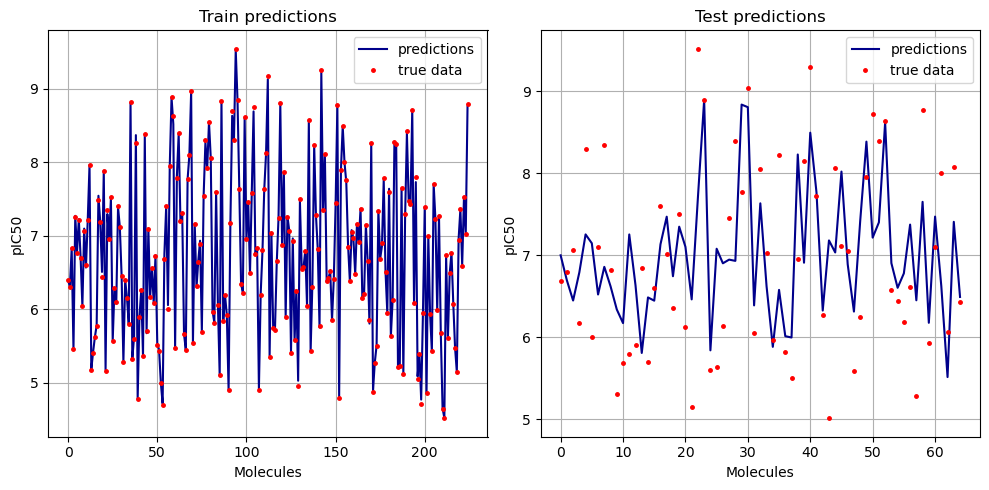

In [65]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 7, 10],
    'n_estimators': [50, 100, 200],
    'colsample_bytree': [0.3, 0.65, 1.0],
    'subsample': [0.8, 0.9, 1.0],
    'reg_lambda': [1, 5]
}

xg_reg = xgb.XGBRegressor(objective='reg:squarederror')

grid_search = GridSearchCV(
    estimator=xg_reg,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(train_X, train_Y)

print("Best Hyperparameters:", grid_search.best_params_)

best_xg_reg = grid_search.best_estimator_

pred_Y_train_xgb = best_xg_reg.predict(train_X)
pred_Y_test_xgb = best_xg_reg.predict(test_X)

evaluate(train_Y, pred_Y_train_xgb, test_Y, pred_Y_test_xgb)
visualizeTrainTest(train_Y, pred_Y_train_xgb, test_Y, pred_Y_test_xgb)